# Gráficos  - Projeto 3 - QTA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import math
import numpy as np

### Obtendo dados


In [2]:
relatorio_qualidade_2005_2010 = pd.read_excel("./planilhas/RelatorioQualidadeAguasSuperficiais-2005-2010.xlsx", engine='openpyxl')
relatorio_qualidade_2010_2015 = pd.read_excel("./planilhas/RelatorioQualidadeAguasSuperficiais-2010-2015.xlsx", engine='openpyxl')
relatorio_qualidade_2015_2020 = pd.read_excel("./planilhas/RelatorioQualidadeAguasSuperficiais-2015-2020.xlsx", engine='openpyxl')
relatorio_qualidade_2020_2021 = pd.read_excel("./planilhas/RelatorioQualidadeAguasSuperficiais-2020-2021.xlsx", engine='openpyxl')
all_dfs = [relatorio_qualidade_2005_2010, relatorio_qualidade_2010_2015, relatorio_qualidade_2015_2020, relatorio_qualidade_2020_2021]
historico = pd.concat(all_dfs)

In [3]:
def get_data_from_parameter(parameter, multiple_parameters = False):
    if not multiple_parameters:
        df = historico[historico["Parametro"] == parameter][["Data Coleta", "Valor"]]
    else:
        df = historico[historico["Parametro"].isin(parameter)][["Parametro", "Data Coleta", "Valor"]]
    
    df['Valor'] = [x.replace(',', '.') for x in df['Valor']]
    df['Valor'] = pd.to_numeric(df.Valor)
    df.sort_values(by='Data Coleta')
    
    return df


ph = get_data_from_parameter("pH")
temp_agua = get_data_from_parameter("Temperatura da Água")
temp_ar = get_data_from_parameter("Temperatura do Ar")
coliformes = get_data_from_parameter("Escherichia coli**")
solidos_suspensos = get_data_from_parameter("Sólido Suspenso Total")
turbidez = get_data_from_parameter("Turbidez")

nitrogenio = get_data_from_parameter(["Nitrogênio Kjeldahl", "Nitrogênio-Nitrito", "Nitrogênio-Nitrato"], multiple_parameters=True)
nitrogenio = nitrogenio.groupby(['Data Coleta']).sum().reset_index()

ox_dissolvido = get_data_from_parameter("Oxigênio Dissolvido")
dbo = get_data_from_parameter("DBO (5, 20)")

variaveis = {'ph':ph,'temperatura da água':temp_agua, 'temperatura do ar':temp_ar, 'coliformes':coliformes, 'solidos suspensos':solidos_suspensos, 'turbidez':turbidez, 'nitrogenio':nitrogenio, 'oxigenio dissolvido':ox_dissolvido, 'dbo':dbo}

### Plotando gráficos 

In [4]:
def plot_data(data_x, data_y, title, y_label):
    fig, ax = plt.subplots(figsize=(12, 4))
    plt.scatter(data_x, data_y)
    plt.scatter(data_x[-1], data_y[-1], color='red')
    plt.gcf().autofmt_xdate()
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel("Data Coleta")
    plt.grid(True)
    if title=='ph':
        ax.set_ylim(bottom=5, top=9);
    plt.savefig(f'img/{title}.png', format='png')
    plt.show()

def filtra_out(dados):
    return dados[dados['Data Coleta'].str.contains('/09/|/10/|/11/')]

### Dados Coletados 

In [5]:
coleta_data = '21/10/2021' 
coleta_ph = 6
coleta_dbo = 40
coleta_ox_dissolvido = 1 #rever
coleta_temp_agua = 20.5
coleta_temp_ar = 22.7
coleta_nitrogenio = 0.7
coleta_turbidez = 32.22
coleta_solidos_suspensos = 5180
coleta_fosforo = 507.6219512 #rever
coleta_coliformes = 18*80*1.25*1000 #n pontos*80*1.25
print(f"Coliformes - {coleta_coliformes}")

Coliformes - 1800000.0


In [6]:
coleta_variaveis = {'ph':coleta_ph,
                    'temperatura da água':coleta_temp_agua, 
                    'temperatura do ar':coleta_temp_ar, 
                    'coliformes':coleta_coliformes, 
                    'solidos suspensos':coleta_solidos_suspensos, 
                    'turbidez':coleta_turbidez, 
                    'nitrogenio':coleta_nitrogenio, 
                    'oxigenio dissolvido':coleta_ox_dissolvido, 
                    'dbo':coleta_dbo}

In [7]:
variaveis['dbo'].columns

Index(['Data Coleta', 'Valor'], dtype='object')

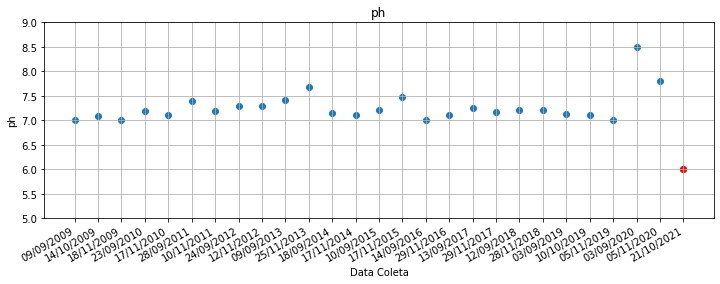

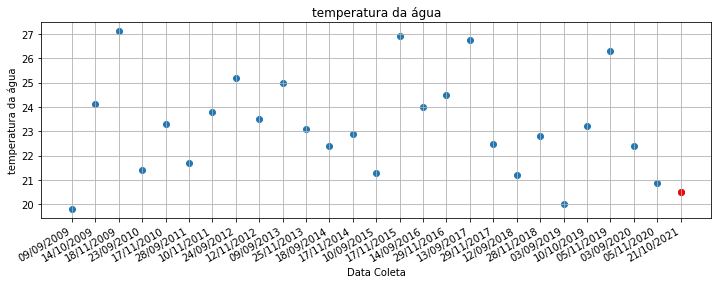

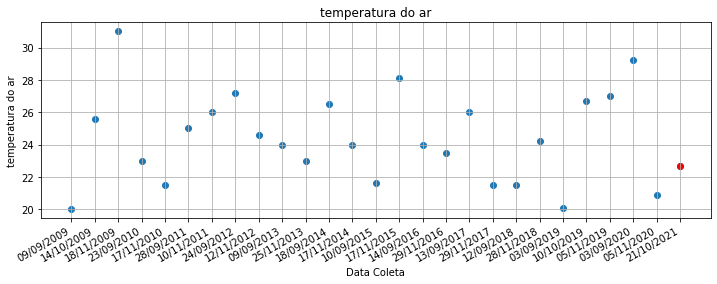

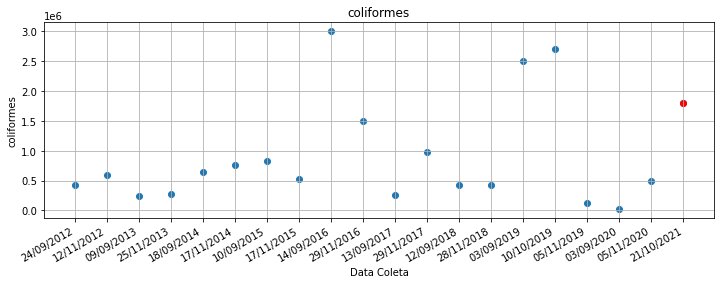

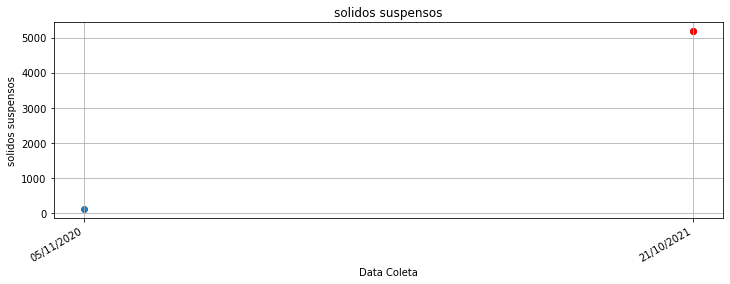

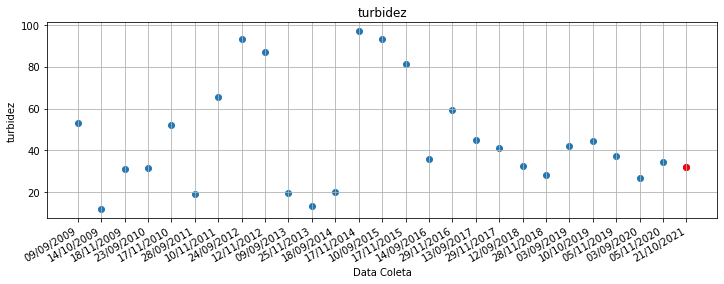

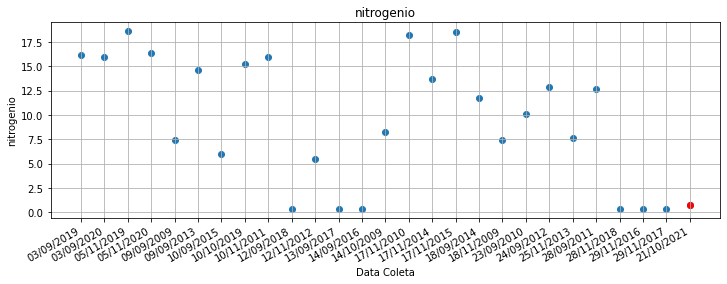

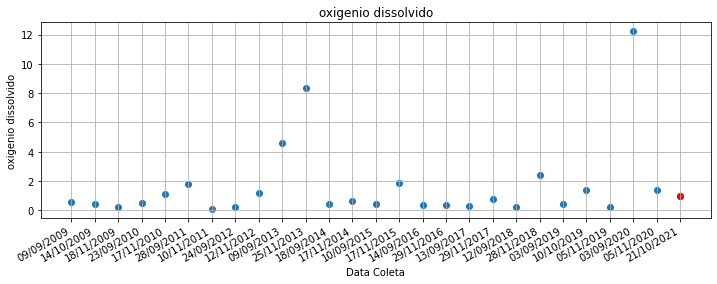

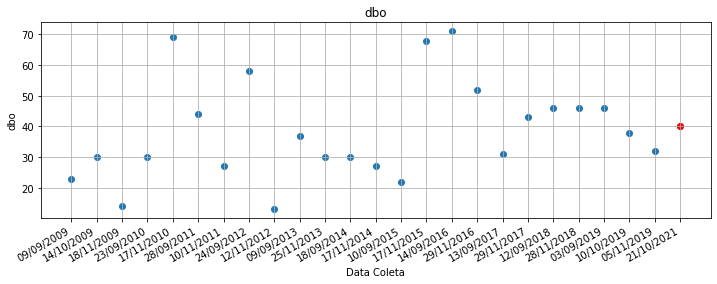

In [8]:
for k,v in variaveis.items():
    v.loc[-1] = [coleta_data, coleta_variaveis[k]] 
    variaveis[k] = filtra_out(v)
    plot_data(variaveis[k]['Data Coleta'], variaveis[k]['Valor'], k, k)
    

## IQA

In [9]:
#definindo os pesos
peso_ph = 0.12
peso_dbo = 0.10
peso_ox_dissolvido = 0.17
peso_temp_agua = 0.10
peso_nitrogenio = 0.10
peso_turbidez = 0.08
peso_fosf = 0.1
peso_solidos_suspensos = 0.08
peso_coli = 0.15


pesos = {'ph':peso_ph,
        'temperatura da água':peso_temp_agua, 
        'coliformes':peso_coli, 
        'solidos suspensos':peso_solidos_suspensos, 
        'turbidez':peso_turbidez, 
        'nitrogenio':peso_nitrogenio, 
        'oxigenio dissolvido':peso_ox_dissolvido, 
        'dbo':peso_dbo,
        'fosforo': peso_fosf}

Conversor: https://www.loligosystems.com/convert-oxygen-units?menu=77


In [10]:
def calcula_IQA(q,peso):
    return


q_ox_dissolvido = 77
q_coliformes = 3
q_ph = 55
q_dbo = 2
q_temp_agua = 77
q_nitrogenio = 100
q_fosforo = 100
q_turbidez = 52
q_solidos_suspensos = 32
coleta_iqa = 26.63 #36.75

In [11]:
q_ox_dissolvido

77

In [12]:
dados_iqa = {'Parametro':['ph', 'temperatura da água','coliformes', 'solidos suspensos', 'turbidez', 'nitrogenio','oxigenio dissolvido','dbo', 'fosforo'], 
             'Valor coleta':[coleta_ph,coleta_temp_agua,coleta_coliformes,coleta_solidos_suspensos,coleta_turbidez,coleta_nitrogenio,coleta_ox_dissolvido, coleta_dbo, coleta_fosforo], 
             'Valor q':[q_ph,q_temp_agua,q_coliformes,q_solidos_suspensos,q_turbidez,q_nitrogenio,q_ox_dissolvido, q_dbo, q_fosforo]}
df_iqa = pd.DataFrame(dados_iqa)
                        

In [13]:
df_iqa

,Parametro,Valor coleta,Valor q
0,ph,6.000000e+00,55
1,temperatura da água,2.050000e+01,77
2,coliformes,1.800000e+06,3
3,solidos suspensos,5.180000e+03,32
4,turbidez,3.222000e+01,52
5,nitrogenio,7.000000e-01,100
6,oxigenio dissolvido,1.000000e+00,77
7,dbo,4.000000e+01,2
8,fosforo,5.076220e+02,100


In [14]:
iqa_anos = {'Ano':[2015,2016,2017,2018,2019,2021],'IQA':[17,17,21,20,27,coleta_iqa], 'Categoria':['Péssimo','Péssimo','Ruim','Ruim','Ruim', 'Ruim']}
df_iqa_anos = pd.DataFrame(iqa_anos)
df_iqa_anos

,Ano,IQA,Categoria
0,2015,17.00,Péssimo
1,2016,17.00,Péssimo
2,2017,21.00,Ruim
3,2018,20.00,Ruim
4,2019,27.00,Ruim
5,2021,26.63,Ruim


In [15]:
anos = [2015,2016,2017,2018,2019,2021]
valores = [17,17,21,20,27,coleta_iqa]
categoria = ['Péssimo','Péssimo','Ruim','Ruim','Ruim', 'Ruim']
data = pd.Series([anos, valores, categoria], index=['Ano', 'IQA', 'Classificação'], name='data')
data

Ano                    [2015, 2016, 2017, 2018, 2019, 2021]
IQA                             [17, 17, 21, 20, 27, 26.63]
Classificação    [Péssimo, Péssimo, Ruim, Ruim, Ruim, Ruim]
Name: data, dtype: object

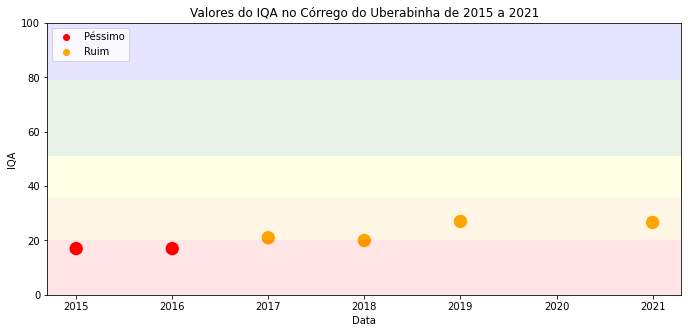

In [16]:
fig = plt.figure(figsize=(25, 5))
ax = fig.add_subplot(121)
ax.set_ylim([0, 100])
ax.set_xlabel('Data')
ax.set_ylabel('IQA')
ax.set_title('Valores do IQA no Córrego do Uberabinha de 2015 a 2021')
ax.axhspan(0, 20, facecolor='red', alpha=0.1)
ax.axhspan(20, 36, facecolor='orange', alpha=0.1)
ax.axhspan(36, 51, facecolor='yellow', alpha=0.1)
ax.axhspan(51, 79, facecolor='green', alpha=0.1)
ax.axhspan(79, 100, facecolor='blue', alpha=0.1)
sns.scatterplot(x='Ano', y='IQA', hue="Classificação",data=data,s=200, palette=['red','orange'])
ax.legend(loc=2, prop={'size': 10})
plt.savefig(f'img/iqa.png', format='png')
plt.show()